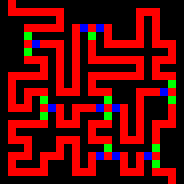

t1: 94 94
t2: 154 154


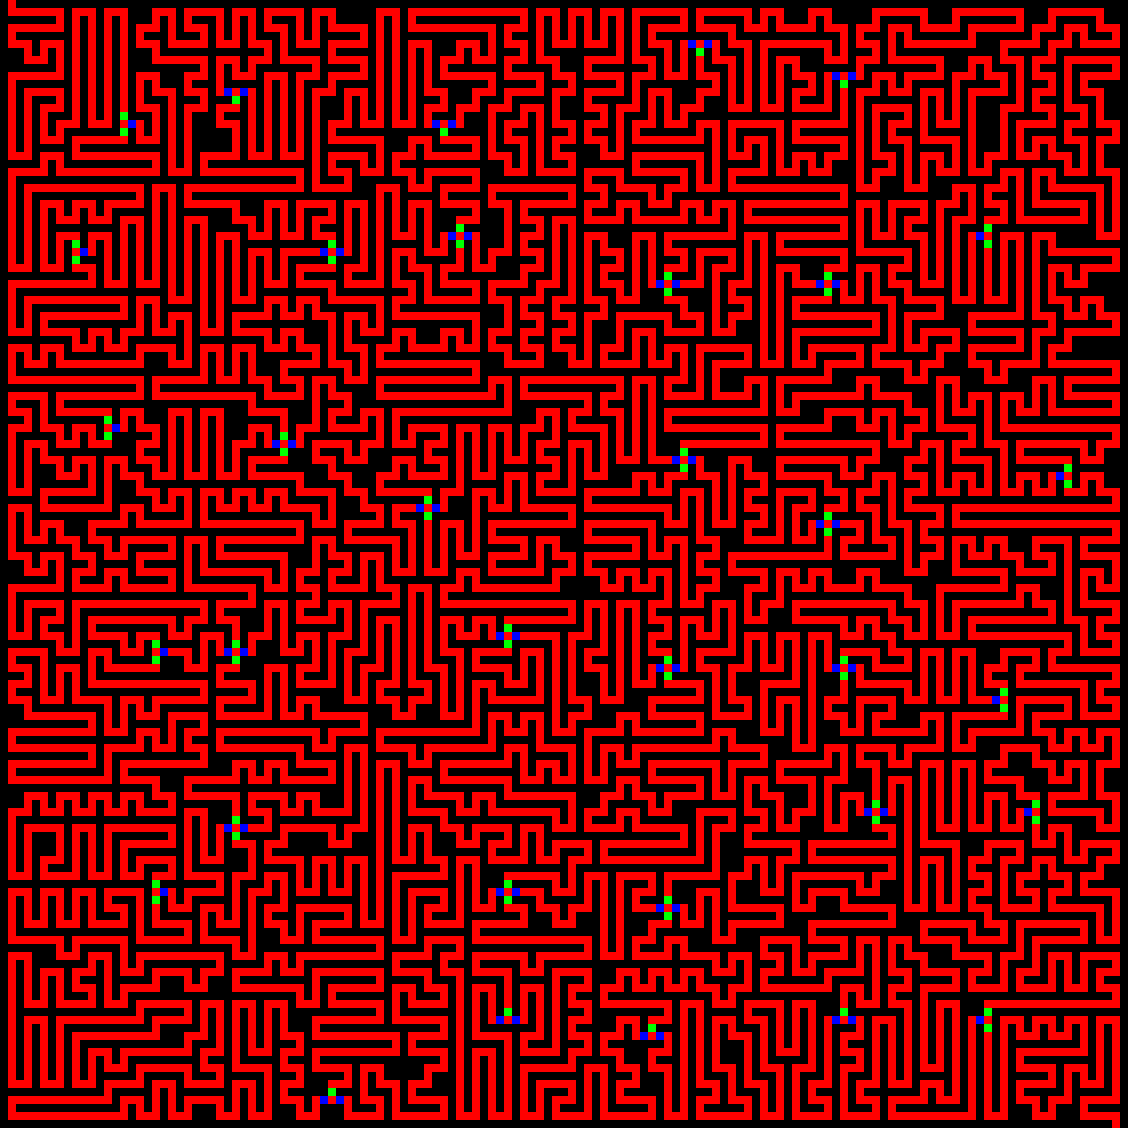

In [1]:
import cv2
import numpy as np
from PIL import Image
from IPython import display
from collections import deque
from functools import lru_cache


def parse(fn):
    L=open(fn).read().split('\n')
    h=len(L)
    w=len(L[0])
    #print(w,h)
    M={}
    s=None
    e=None
    for y in range(h):
        for x in range(len(L[y])):
            if y==0 and L[y][x]=='.':
                s=(x,y)
            if y==h-1 and L[y][x]=='.':
                e=(x,y)
            M[(x,y)]=L[y][x]
    return M,w,h,s,e

def dr(fn):
    col={
    '#':[0,0,0],
    '.':[255,0,0],
    'v':[0,255,0],
    '>':[0,0,255]
    }
    M,w,h,s,e=parse(fn)
    pix = np.zeros([h,w,3]).astype(np.ubyte)
    for x,y in M.keys():
        pix[y,x,:]=col[M[(x,y)]]
    F=8
    pix = cv2.resize(pix, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    #display.clear_output(wait=True)
    display.display(Image.fromarray(pix, 'RGB'))


    

def p(fn,pt):
    M,w,h,s,e=parse(fn)
    #print(set(M.values()))
    L={}
    #print(w,h,s,e)
    
    R=[]
    S=[[s]]
    z=0
    while len(S):
        
        p=S[0]
        S=S[1:]
        if p[-1] in L and len(p)<len(L[p[-1]]):
            continue
        z+=1
        if z%1000==0:
            
            print("%d %d %d %d %d"%(z,len(S),len(p),len(R),max([len(zz) for zz in R]) if len(R) else 0),end='\r')
        if p[-1]==e:
            R.append(p)
            continue
        x,y=p[-1]
        for dx,dy in [(1,0),(0,1),(-1,0),(0,-1)]:
            xx=x+dx
            yy=y+dy
            pp=(xx,yy)
            if pp in M:
                c=M[pp]
                ok=0
                if pt==1:
                    if c=='.':
                        ok=1
                    elif c=='v' and dy==1:
                        ok=1
                    elif c=='>' and dx==1:
                        ok=1
                if pt==2:
                    if c in ".v>":
                        ok=1
                if ok:
                    if not pp in p:
                        #p2=copy.deepcopy(p)
                        p2=p[:]
                        p2.append(pp)
                        if not pp in L or len(p2)>=len(L[pp]):
                            L[pp]=p2
                            S.append(p2)
     
    R=sorted(R, key=lambda x: len(x))
    #print(len(R))    
    
    
    #path is all locations, so aubtract one to get steps
    return len(R[-1])-1

dr("test23.txt")

print("t1:",p("test23.txt",1),94)
print("t2:",p("test23.txt",2),154)
dr("23.txt")
#print("p1:",p("23.txt",1),2310)
#print("p2:",p("23.txt",2),2)
#p2
#2294 too low
#2150 too low
#5126 too low
#print("p2:",p("23.txt",2),1)

In [2]:
M=None

@lru_cache(maxsize=None)
def warp(a,b,valid):
    global M
    p=[a,b]
    while 1:
        x,y=b
        o=[]
        for dx,dy in [(1,0),(0,1),(-1,0),(0,-1)]:
            xx=x+dx
            yy=y+dy
            pp=(xx,yy)
            if not pp in p and pp in M and M[pp] in valid:
                 o.append(pp)
            if len(o)>1:
                break
        if len(o)==1:
            p.append(o[0])
        else:
            break
    return p[2:]
        
    
    

def m2(fn,pt):
    global M
    M,w,h,s,e=parse(fn)
    L={}
    wm={}
    
    R=[]
    S=[]
    S.append([s])
    z=0
    vvv="."
    if pt==2:
        vvv=".v>"
    while len(S):
        S=sorted(S,key=lambda x: len(x), reverse=True)
        #p=S.pop()
        p=S[0]
        S=S[1:]
        
        #if p[-1] in L and len(p)<len(L[p[-1]]):
        #    continue
        z+=1
        if z%1000==0:
            
            print("%d %d %d %d %d"%(z,len(S),len(p),len(R),max([len(zz) for zz in R])-1 if len(R) else 0),end='\r')
        if p[-1]==e:
            R.append(p)
            continue
        x,y=p[-1]
        
        for dx,dy in [(1,0),(0,1),(-1,0),(0,-1)]:
            xx=x+dx
            yy=y+dy
            pp=(xx,yy)
            if pp in M:
                c=M[pp]
                ok=0
                if pt==1:
                    if c == '.':
                        ok=1
                    elif c=='v' and dy==1:
                        ok=1
                    elif c=='>' and dx==1:
                        ok=1
                if pt==2:
                    if c in ".v>":
                        ok=1
                if ok:
                    if not pp in p:
                        p2=p[:]
                        p2.append(pp)
                        a,b=p2[-2:]
                        p2+=warp(a,b,vvv)
                        #if not p2[-1] in L or len(p2)>len(L[p2[-1]]):
                        #    L[p2[-1]]=p2[:]
                        S.append(p2)
    R=sorted(R, key=lambda x: len(x))
    #print(len(R))    
    
    
    #path is all locations, so aubtract one to get steps
    return len(R[-1])-1

#print("t1:",m2("test23.txt",1),94)
#print("t2:",m2("test23.txt",2),154)
#dr("23.txt")
#print("\np1:",m2("23.txt",1),2310)
#print("\np2:",m2("23.txt",2),2)
#p2
#2294 too low
#2150 too low
#5126 too low
#not 7542
#not 6226
#not 7291
#not 7238
#nir 7239
#not 7290
#not 7622

#print("\n\np2:",p("23.txt",2),1)


36
p2: None 2
